# Biographical Analysis
Dastan Abdulla  
Ling 1340: Data Science for Linguists  
04/08/2024  

## About this Notebook
The goal of this notebook is to provide analysis for the biographical information of the participants for the Speech Accent Archive dataset. 

## Table of Contents
- [Reloading the Data Frame](#reloading-the-data-frame)
- [General Biographical Analysis](#general-biographical-analysis)
  - [Age Representation](#age-representation)
  - [Ethnologue and Language Representation](#ethnologue-and-language-representation)
  - [Length of Residency and Onset Age](#length-of-residency-and-onset-age)
  - [Gender and Learning Style](#gender-and-learning-style)


In [67]:
# Imports
import pandas as pd
import numpy as np
# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Reloading the Data Frame

In [68]:
# Reloading the data frame
saa_df = pd.read_pickle("../data/saa_df.pkl")

In [69]:
saa_df.sample(10)

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription,language_name
817,816,lithuanian,lithuania,23.0,female,12.0,NaN,0.0,academic,lithuanian4.wav,lithuanian4.txt,lit,\[pliz kɔl stɛla æsk hɚ tŭ bɹʷɪ̃ŋ ðis θɪ̃ŋks ...,Lithuanian
2414,2418,mandarin,china,23.0,female,13.0,usa,0.1,academic,mandarin82.wav,None,cmn,None,Mandarin Chinese
965,964,latvian,latvia,70.0,female,11.0,"india, usa",57.0,naturalistic,latvian2.wav,latvian2.txt,lav,\[pl̥iːz̥ kɑl stɛlə æsk ɚ tu brɪ̃ːŋ ðiːs θɪ̃ŋs...,Latvian
2698,2704,cantonese,china,26.0,female,7.0,usa,2.0,academic,cantonese32.wav,None,yue,None,Yue Chinese
2111,2113,english,usa,39.0,male,0.0,usa,39.0,naturalistic,english571.wav,None,eng,None,English
833,832,french,algeria,47.0,male,13.0,NaN,0.0,academic,french24.wav,french24.txt,fra,\[pliːz̥ kɔl stɛla æskt hɜ tœ bɹɪ̃ŋ zɪs̪ sɪ̃ŋz...,French
1281,1282,turkish,türkiye,23.0,male,6.0,NaN,0.0,academic,turkish22.wav,turkish22.txt,tur,\[pliz̥ kɑl stɛlʌ̆ æsk hɚ t̪ŭ bɹɪ̃ŋ d̪iz̥ t̪ɪ...,Turkish
1510,1511,fanti,ghana,24.0,female,7.0,"uk, usa",10.5,academic,fanti2.wav,fanti2.txt,aka,\[pʰliːs kʰɑlˠ stɛləː æs hɛː tʰu bɹɪ̃ːŋ ðiːs θ...,Akan
2708,2714,mandarin,china,21.0,male,6.0,usa,1.0,academic,mandarin123.wav,None,cmn,None,Mandarin Chinese
2007,2009,spanish,el salvador,24.0,male,12.0,usa,12.0,academic,spanish141.wav,None,spa,None,Spanish


## General Biographical Analysis

### Age Representation

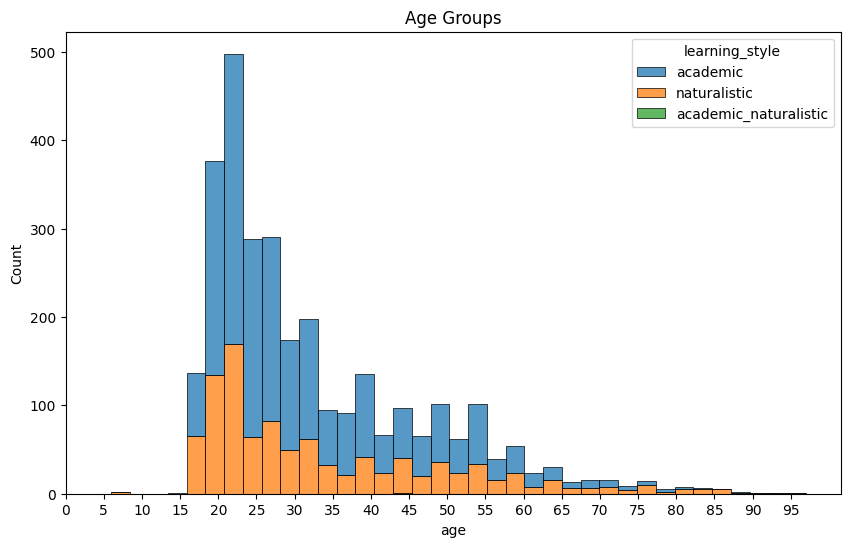

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(
    saa_df,
    x="age", hue="learning_style",
    multiple="stack",
    linewidth=.5,
)
plt.title('Age Groups')
plt.xticks(np.arange(0, 100, 5))
plt.show()

* That's strange, let's examine and see why there is almost no learning style reported for ages younger than ~16

In [71]:
young_subset = saa_df[saa_df['age'] < 18]
young_subset.head(50)

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription,language_name
28,29,bambara,mali,15.5,female,12.0,usa,0.4,academic,bambara1.wav,bambara1.txt,bam,\[pliːs kɔl stela ʔæ̆sk hɜɹ tŭ brɪ̃ŋ d̪iz t̪ɪ...,Bambara
71,72,english,usa,7.0,female,0.0,usa,7.0,naturalistic,english15.wav,english15.txt,eng,\[pʰləĭz kʰaːlˠ stəɛlə æsk hɝ tʰə bɹəɪ̃ŋ ðəĭ...,English
343,344,spanish,colombia,17.0,female,16.0,usa,0.1,academic,spanish3.wav,spanish3.txt,spa,\[plis kʰɔːl estela æsx heɹ tŭ bɹĩṉ d̪iz̥ θ...,Spanish
354,355,synthesized,NaN,0.0,male,0.0,mac system 8.5,0.0,NaN,synthesized1.wav,None,NaN,None,NaN
355,356,synthesized,NaN,0.0,female,0.0,mac system 8.5,0.0,NaN,synthesized2.wav,None,NaN,None,NaN
356,357,synthesized,NaN,0.0,female,0.0,mac system 8.5,0.0,NaN,synthesized3.wav,None,NaN,None,NaN
357,358,synthesized,NaN,0.0,male,0.0,mac system 8.5,0.0,NaN,synthesized4.wav,None,NaN,None,NaN
1216,1216,english,usa,6.0,male,0.0,usa,6.0,naturalistic,english335.wav,None,eng,None,English


It appears that we simply do not have many entries for people who are younger than 18 years old which would explain the original skew in the data. That is very significant information to know about the data as any conclusions we draw from this point onwards, may not necessarily apply to people under 18.

### Ethnologue and Language Representation

In [72]:
# Let's look at what languages are represented in the saa
saa_df['ethnologue_language_code'].unique()

array(['afr', 'any', 'als', 'aln', 'amh', 'ars', 'arz', 'aeb', 'acm',
       'apc', 'abv', 'afb', 'ary', 'ayn', 'ajp', 'hye', 'azj', 'fmp',
       'bsp', 'bca', 'bam', 'bax', 'bqe', 'ben', 'bos', 'bul', 'yue',
       'cal', 'cat', 'cha', 'ces', 'dan', 'gbz', 'nld', 'igb', 'bin',
       'eng', 'ewe', 'fak', 'aka', 'pes', 'fin', 'fra', 'fri', 'kat',
       'deu', 'ell', 'guj', 'guz', 'heb', 'hin', 'hsn', 'hun', 'ibo',
       'ind', 'ita', 'jpn', 'kan', 'kaz', 'khm', 'kir', 'swh', 'kor',
       'kri', 'ckb', 'slp', 'lao', 'lav', 'lit', 'luo', 'mkd', 'zlm',
       'mal', 'cmn', 'emk', 'mar', 'mfe', 'khk', 'mos', 'mrl', 'npi',
       'nor', 'gaz', 'pon', 'pol', 'por', 'pnb', 'pan', 'quh', 'qvh',
       'ron', 'rus', 'sdn', 'swy', 'stw', 'srp', 'scn', 'sin', 'slk',
       'som', 'spa', 'swe', nan, 'tgl', 'tlg', 'nan', 'tam', 'tat', 'tel',
       'tha', 'bod', 'tir', 'tpi', 'tur', 'urd', 'uig', 'uzn', 'uzs',
       'vie', 'wof', 'ydd', 'zul', 'mlt', 'gcf', 'yor', 'dib', 'bel',
       'isl', '

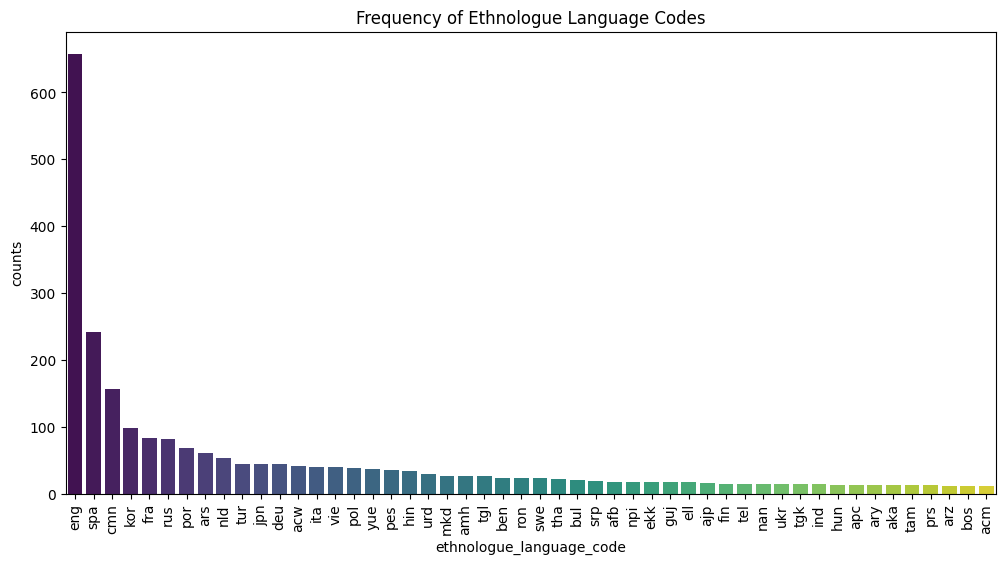

In [73]:
top_n = 50
plt.figure(figsize=(12, 6))  
saa_df_sorted = saa_df['ethnologue_language_code'].value_counts().nlargest(top_n).reset_index()
saa_df_sorted.columns = ['ethnologue_language_code', 'counts']  
sns.barplot(x='ethnologue_language_code', y='counts', data=saa_df_sorted, hue="ethnologue_language_code", palette='viridis')
plt.xticks(rotation=90) 
plt.title('Frequency of Ethnologue Language Codes')
plt.show()

* It seems like english is the most represented in the data, with Spanish and Mandarin chinese coming in second and third.
* NEW FOR PROGRESS REPORT 3:  
Let's see what it looks like without english

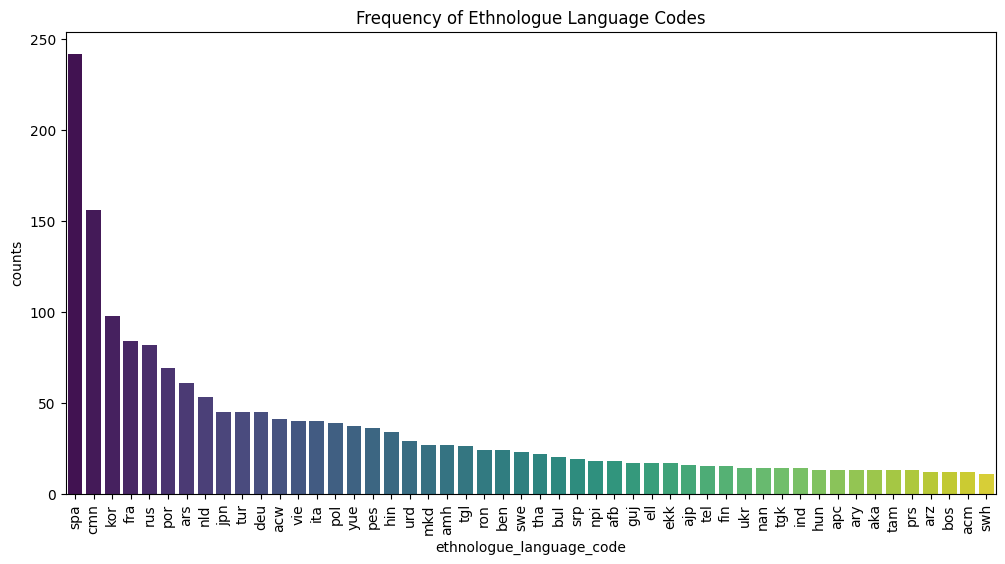

In [74]:
top_n = 50
plt.figure(figsize=(12, 6))  
saa_df_sorted = saa_df[saa_df['ethnologue_language_code'] != 'eng']['ethnologue_language_code'].value_counts().nlargest(top_n).reset_index()
saa_df_sorted.columns = ['ethnologue_language_code', 'counts']  
sns.barplot(x='ethnologue_language_code', y='counts', data=saa_df_sorted, hue="ethnologue_language_code", palette='viridis')
plt.xticks(rotation=90) 
plt.title('Frequency of Ethnologue Language Codes')
plt.show()

### Length of Residency and Onset Age

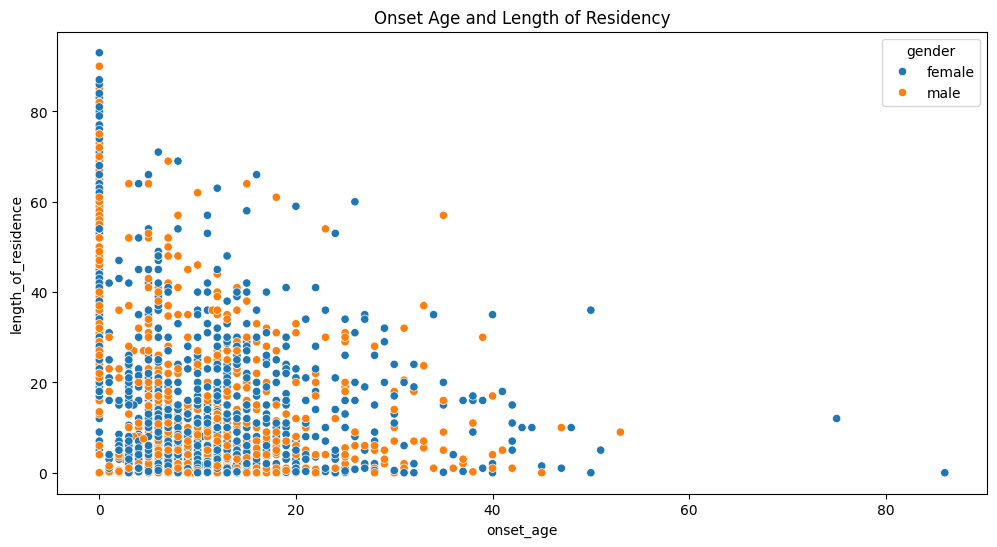

In [75]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x='onset_age', y='length_of_residence', data=saa_df, hue="gender")
plt.title('Onset Age and Length of Residency')
plt.show()

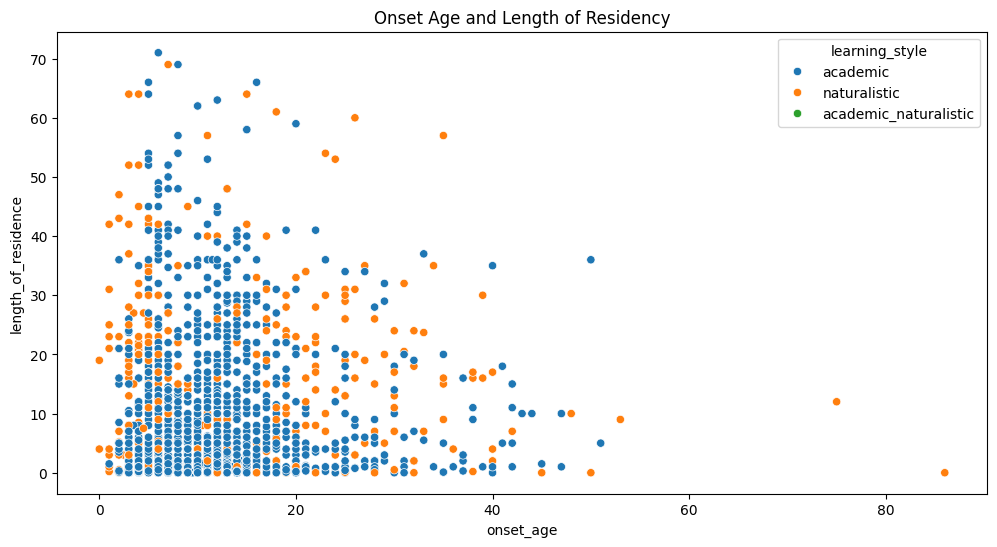

In [76]:
# let's exclude the native english speakers since it's clearly skewing the data
plt.figure(figsize=(12, 6)) 
non_native = saa_df[saa_df['ethnologue_language_code'] != 'eng']
sns.scatterplot(x='onset_age', y='length_of_residence', data=non_native, hue="learning_style")
plt.title('Onset Age and Length of Residency')
plt.show()

* It appears that there is trend in which, the earlier the speakers are exposed to english, the longer their length of residence in the location they began to learn it.

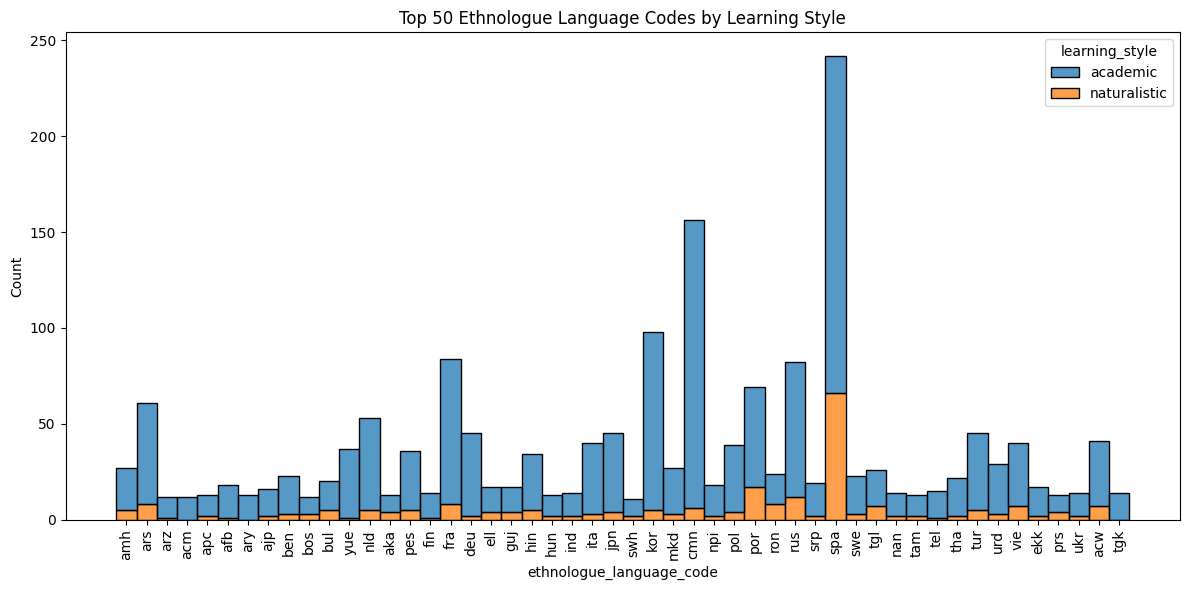

In [77]:
# Again excluding english
df_without_eng = saa_df[saa_df['ethnologue_language_code'] != 'eng']
code_counts = df_without_eng['ethnologue_language_code'].value_counts()
top_codes = code_counts.head(50).index
top_df = df_without_eng[df_without_eng['ethnologue_language_code'].isin(top_codes)]

plt.figure(figsize=(12, 6)) 
sns.histplot(data=top_df, x='ethnologue_language_code', hue='learning_style', multiple='stack')

plt.xticks(rotation=90)
plt.title('Top 50 Ethnologue Language Codes by Learning Style')
plt.tight_layout() 

plt.show()

* Out of the top 50 represented ethnologue languages in the dataset, it seems the majority of the speakers learned english academically across each ethnologue. 

### Gender and Learning Style

In [78]:
# Filter to make learning style binary
filtered_df = saa_df[saa_df['learning_style'].isin(['academic', 'naturalistic'])]

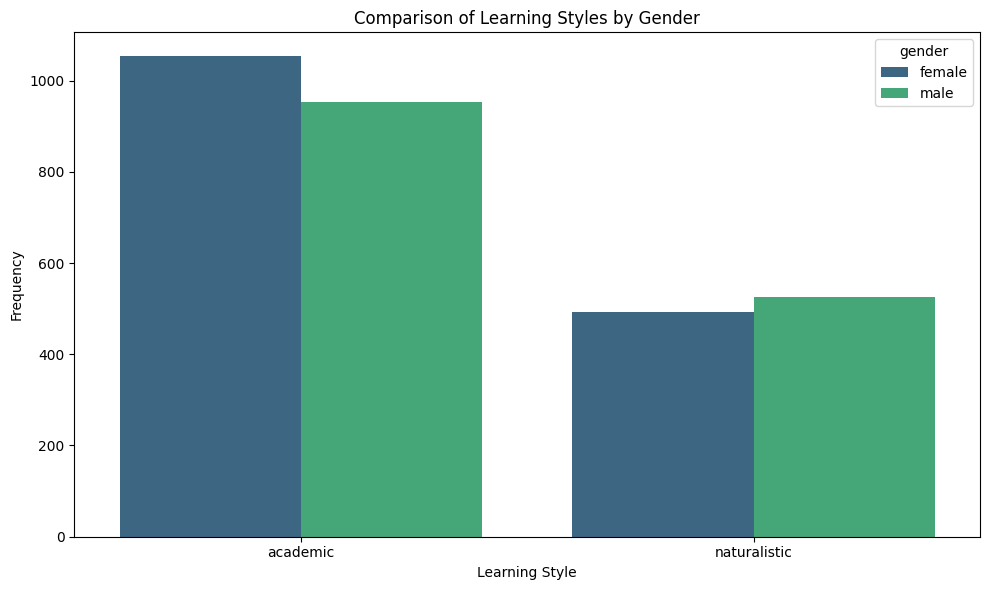

In [79]:
plt.figure(figsize=(10, 6))

# Create a bar plot with gender as hue to compare frequencies
ax = sns.countplot(x='learning_style', hue='gender', data=filtered_df, palette='viridis')

ax.set_title('Comparison of Learning Styles by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Learning Style')

# Show the plot
plt.tight_layout()
plt.show()

* Now let's see what would happen if we exclude native English speakers.

In [80]:
# Excluding english speakers
filtered_df = filtered_df[filtered_df['native_language'] != 'english']

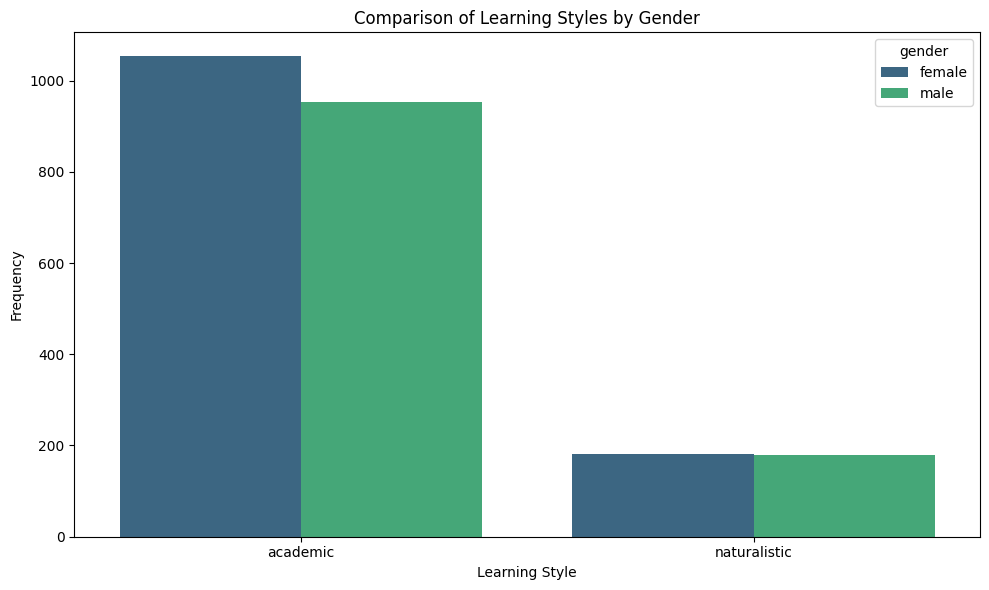

In [81]:
plt.figure(figsize=(10, 6))

# Create a bar plot with gender as hue to compare frequencies
ax = sns.countplot(x='learning_style', hue='gender', data=filtered_df, palette='viridis')

ax.set_title('Comparison of Learning Styles by Gender')
ax.set_ylabel('Frequency')
ax.set_xlabel('Learning Style')

# Show the plot
plt.tight_layout()
plt.show()

## For Progress Report 3: Too Many Languages Represented!
There are 231 unique Ethnologue Language Codes in the current dataset, which is very difficult to analyze. To simplify this, we can make a new column that contains the language families each entry is associated with. We can utilize the [Glottolog database](https://glottolog.org/) to achieve this, which provides a csv file that conveniently contains the mappings for us.  
### Credits  
```Hammarström, Harald & Forkel, Robert & Haspelmath, Martin & Bank, Sebastian. 2024.
Glottolog 5.0.
Leipzig: Max Planck Institute for Evolutionary Anthropology.
https://doi.org/10.5281/zenodo.10804357
(Available online at http://glottolog.org, Accessed on 2024-04-08.)```


In [82]:
langs_dialects_df = pd.read_csv('../data/languages_and_dialects_geo.csv')
langs_dialects_df.sample(5)

,glottocode,name,isocodes,level,macroarea,latitude,longitude
18615,tala1285,Talaud,tld,language,Papunesia,4.11846,126.795
12844,natc1249,Natchez,ncz,language,North America,31.75000,-91.330
4045,dats1234,Datshang,NaN,dialect,Eurasia,NaN,NaN
20269,vall1258,Valluno Spanish,NaN,dialect,Eurasia,NaN,NaN
16174,repa1237,Repanbitip,rpn,dialect,Papunesia,-16.32650,167.619


In [83]:
not_represented = {}
for index, row in saa_df.iterrows():
    code = row['ethnologue_language_code']
    try:
        if not pd.isnull(code):
            area = langs_dialects_df[langs_dialects_df['isocodes'] == code]['macroarea'].iloc[0]
            saa_df.at[index, 'macroarea'] = area
    except:
        not_represented[code] = row['language_name']

In [84]:
print(not_represented)

{'nan': 'Min Nan Chinese', 'ori': 'Oriya (macrolanguage)', 'ara': 'Arabic', 'dut': 'Dutch'}


In [85]:
# Let's check the arabic specifications
matches = saa_df[saa_df['native_language'].str.contains('arabic', case=False)]
matches['native_language'].unique()

array(['arabic'], dtype=object)

In [86]:
# Let's check the dutch specifications
matches = saa_df[saa_df['native_language'].str.contains('dutch', case=False)]
matches['native_language'].unique()

array(['dutch'], dtype=object)

In [87]:
# Let's check the Oriya specifications
matches = saa_df[saa_df['native_language'].str.contains('oriya', case=False)]
matches['native_language'].unique()

array(['oriya'], dtype=object)

In [88]:
# Let's check the Min Nan specifications
matches = saa_df[saa_df['native_language'].str.contains('min nan', case=False)]
matches['native_language'].unique()

array(['min nan'], dtype=object)

- For those 4 languages, we can make a custom mapping function to specify their regions.

In [89]:
non_represented_macroarea = {
    # arabic has dialects belonging to both euroasia and africa
    'ara':'Eurasia-Africa',
    'ori':'Eurasia',
    # spoken in  Indian state of Odisha which is in Euroasia
    'dut':'Eurasia',
    'nan':'Eurasia'
}

null_codes = []

for index, row in saa_df.iterrows():
    code = row['ethnologue_language_code']
    if pd.isnull(code):
        null_codes.append(row['native_language'])
    else:
        try:
            area = langs_dialects_df[langs_dialects_df['isocodes'] == code]['macroarea'].iloc[0]
            saa_df.at[index, 'macroarea'] = area
        except:
            saa_df.at[index, 'macroarea'] = non_represented_macroarea[code]

In [90]:
set(null_codes)

{'home sign', 'synthesized'}

In [91]:
saa_df[saa_df['native_language'] == 'home sign']

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription,language_name,macroarea
2385,2389,home sign,india,40.0,male,5.0,usa,20.0,academic,homesign1.wav,None,NaN,None,NaN,nan


- We can ignore the synthesized samples for now since they do belong in any category. Furthermore, if we needed any proficiency metrics later on, we will be producing it on our own.
- For the 'home sign', we could look at the country, but it is not transcribed anyways, so we can ignore it as well.
- Given those two factors, we can drop those entries from the data for the upcoming analysis.

In [92]:
saa_df = saa_df[(saa_df['native_language'] != 'synthesized') & (saa_df['native_language'] != 'home sign')]

In [93]:
saa_df.sample(5)

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription,language_name,macroarea
1562,1562,vietnamese,vietnam,23.0,male,6.0,NaN,0.0,academic,vietnamese13.wav,None,vie,None,Vietnamese,Eurasia
937,936,german,switzerland,41.0,male,16.0,usa,0.5,academic,german20.wav,german20.txt,deu,\[pʰləis kɔlˠ stɛla ask hɚ tŭ bɹɪ̃ŋ dis θɪ̃ŋz...,German,Eurasia
969,968,dari,afghanistan,20.0,male,12.0,usa,8.0,academic,dari3.wav,dari3.txt,prs,\[pʰliːz̥ kɑl əstɛlɛ æsk ɚ tu bɹɪ̃ŋ diːz̥ tɪ̃ŋ...,Dari,Eurasia
2057,2058,korean,south korea,23.0,male,10.0,usa,10.0,academic,korean47.wav,None,kor,None,Korean,Eurasia
432,433,yapese,federated states of micronesia,34.0,female,14.0,usa,10.0,academic,yapese1.wav,yapese1.txt,yap,\[plis kɒl stɛlə æsk hɝ tŭ βɹɪ̃ŋ d̪is θĩŋs w...,Yapese,Papunesia


In [94]:
print(set(saa_df['macroarea'].unique()))

{'Papunesia', 'North America', 'Eurasia-Africa', 'Africa', nan, 'South America', 'Eurasia'}


In [95]:
saa_df[saa_df['macroarea'].isna()]

,speakerid,native_language,country,age,gender,onset_age,english_residence,length_of_residence,learning_style,speech_sample,phonetic_transcription,ethnologue_language_code,transcription,language_name,macroarea
186,187,frisian,netherlands,62.0,male,13.0,"usa,canada",27.0,academic,frisian1.wav,frisian1.txt,fri,\[pliz̥ kɑl stɛla æ̞sk hɚ tə brɪ̃ŋ d̪iz̥ θɪ̃ŋz...,Western Frisian,NaN
708,708,chittagonian,bangladesh,39.0,male,12.0,usa,9.0,academic,chittagonian1.wav,chittagonian1.txt,cit,\[njaʊ pliz̥ kɔl eʌ pliz̥ kɔl stɪlə as hɜ tʰu ...,Chittagonian,NaN


- Let's handle those two exceptions as well.

In [96]:
saa_df.loc[saa_df['speakerid'] == 187, 'macroarea'] = 'Eurasia'
saa_df.loc[saa_df['speakerid'] == 708, 'macroarea'] = 'Eurasia'

In [97]:
print(set(saa_df['macroarea'].unique()))

{'Papunesia', 'North America', 'Eurasia-Africa', 'Africa', 'South America', 'Eurasia'}


- Now that we are finally done with grunt work, let's do some graphing!

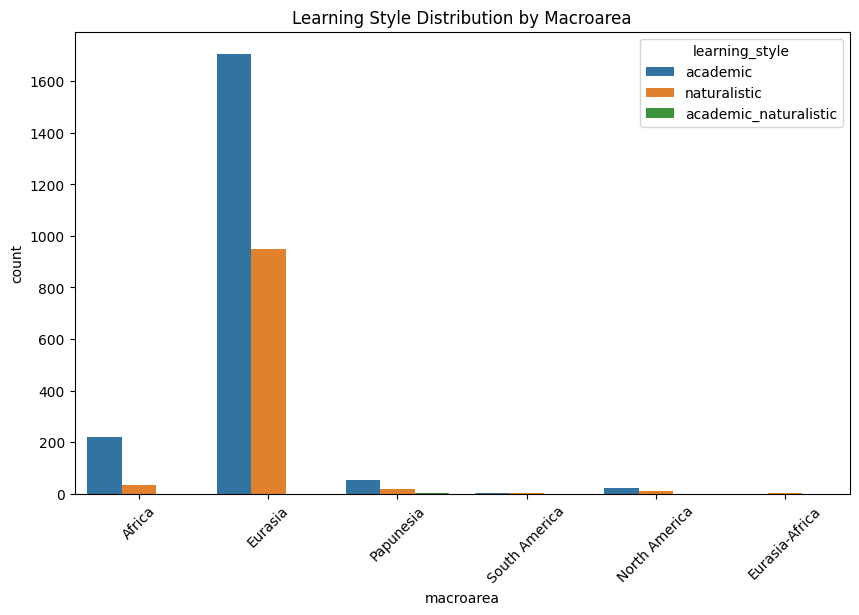

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='macroarea', hue='learning_style', data=saa_df)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.title('Learning Style Distribution by Macroarea')
plt.show()

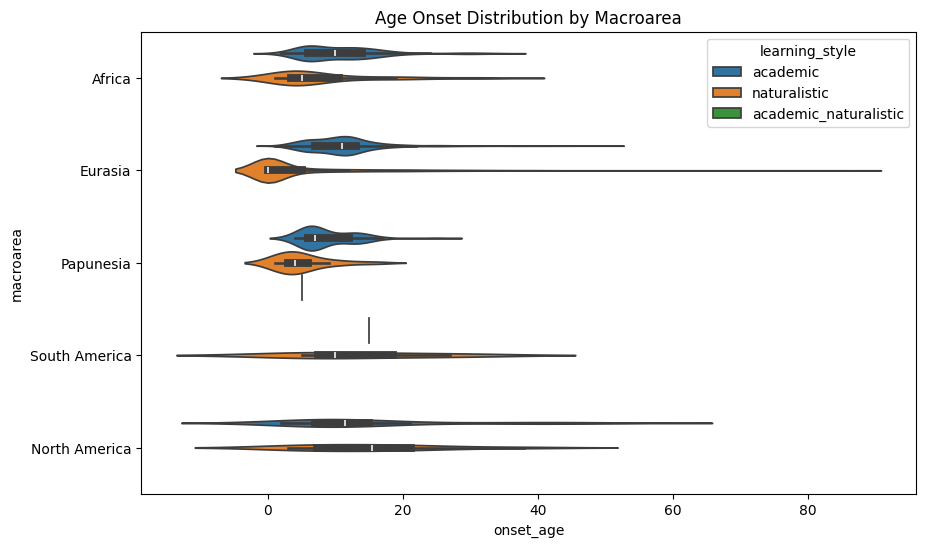

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='macroarea', x='onset_age', data=saa_df[saa_df['macroarea'] != 'Eurasia-Africa'], hue='learning_style')
plt.xticks(rotation=0)
plt.title('Age Onset Distribution by Macroarea')
plt.show()

* From the above plot, we can infer that the academic learning style tends to have a broader and sometimes higher age_onset across macroareas, whereas naturalistic learners tend to start at a younger age, especially noticeable in Papunesia, Africa, and Eurasia. The only exception seems to be North America and (maybe) South America. For South America we do not have enough samples to be conclusive.

# Added for Analysis Portion

In [100]:
long_lat_df = pd.read_csv('../data/country_lat_and_long.csv')
long_lat_df.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [101]:
saa_df['country'].str.lower()

0        south africa
1        south africa
2       côte d'ivoire
3              serbia
4             albania
            ...      
3026          germany
3027        singapore
3028              usa
3029              usa
3030              usa
Name: country, Length: 3026, dtype: object

In [102]:
long_lat_df['country'] = long_lat_df['country'].str.lower()
saa_df['country'] = saa_df['country'].str.lower()

In [103]:
# see what values are not in the longitude and latitude data frame
import pandas as pd

# Assuming transcribed_saa_df and lat_long_df are your DataFrames

# Convert the 'country' columns from both DataFrames to sets
countries_in_transcribed = set(saa_df['country'])
countries_in_lat_long = set(long_lat_df['country'])

# Find countries present in transcribed_saa_df but not in lat_long_df
in_saa_not_pos = countries_in_transcribed - countries_in_lat_long

print(in_saa_not_pos)

{'virgin islands, u.s.', 'russian federation', 'myanmar', 'democratic republic of the congo', 'slovak republic', 'federated states of micronesia', 'türkiye', 'united kingdom of great britain and northern ireland', 'palestine, state of', 'curaçao', 'north macedonia', 'usa'}


In [104]:
corrected_long_lat_countries = {
    'virgin islands, u.s.':'u.s. virgin islands',
    'russian federation':'russia',
    'myanmar':'myanmar [burma]',
    'democratic republic of the congo':'congo [drc]',
    'slovak republic':'slovakia',
    'federated states of micronesia':'micronesia',
    'türkiye':'turkey',
    'united kingdom of great britain and northern ireland':'united kingdom',
    'palestine, state of':'palestinian territories',
    'curaçao':'netherlands antilles',
    'north macedonia':'macedonia [fyrom]',
    'usa':'united states'
}
def look_up_longitude_latitude(saa_country):
    country = saa_country
    if saa_country not in countries_in_lat_long:
        country = corrected_long_lat_countries[saa_country]
    lat = long_lat_df.loc[long_lat_df['country'] == country, 'latitude'].iloc[0]
    long = long_lat_df.loc[long_lat_df['country'] == country, 'longitude'].iloc[0]
    return (lat, long)

saa_df['coordinate'] = saa_df['country'].apply(look_up_longitude_latitude)
saa_df['coordinate'].head()

0    (-30.559482, 22.937506)
1    (-30.559482, 22.937506)
2       (7.539989, -5.54708)
3     (44.016521, 21.005859)
4     (41.153332, 20.168331)
Name: coordinate, dtype: object

# Saving the model (parallel to features)

In [105]:
transcribed_saa_df = saa_df[saa_df['transcription'].notnull()].copy()
transcribed_saa_df.drop(['transcription'], inplace=True, axis=1)
transcribed_saa_df.to_pickle('../data/bio_df.pkl')